In [2]:
%reload_ext autoreload
%autoreload 2  # reload all packages (for dev purposes)

In [3]:
import os
import sys
sys.path.append("..")  # add top folder to path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import roc_auc_score
import impepdom
import torch

In [4]:
model = impepdom.MultilayerPerceptron(num_hidden_layers=2, hidden_layer_size=100)
save_folder, baseline_metrics = impepdom.run_experiment(
    model,
    hla_allele='HLA-A01:01',
    padding='flurry',
    train_fold_idx=[0, 1, 2, 3],
    val_fold_idx=[4],
    learning_rate=2e-3,
    num_epochs=5,
    batch_size=128,
    toy=False)

epoch 1/5 started at 0.0122 s
train loss: 0.0372 accuracy: 0.9916 auc: 0.8934
val loss: 0.0307 accuracy: 0.9922 auc: 0.9306

epoch 2/5 started at 20.6640 s
train loss: 0.0326 accuracy: 0.9923 auc: 0.9101
val loss: 0.0313 accuracy: 0.9923 auc: 0.9280

epoch 3/5 started at 39.3661 s
train loss: 0.0320 accuracy: 0.9924 auc: 0.9116
val loss: 0.0299 accuracy: 0.9926 auc: 0.9318

epoch 4/5 started at 58.2786 s
train loss: 0.0313 accuracy: 0.9925 auc: 0.9154
val loss: 0.0321 accuracy: 0.9924 auc: 0.9284

epoch 5/5 started at 78.1207 s
train loss: 0.0309 accuracy: 0.9925 auc: 0.9161
val loss: 0.0306 accuracy: 0.9927 auc: 0.9305

training completed in 1 m 37.5168 s
best validation auc: 0.9318


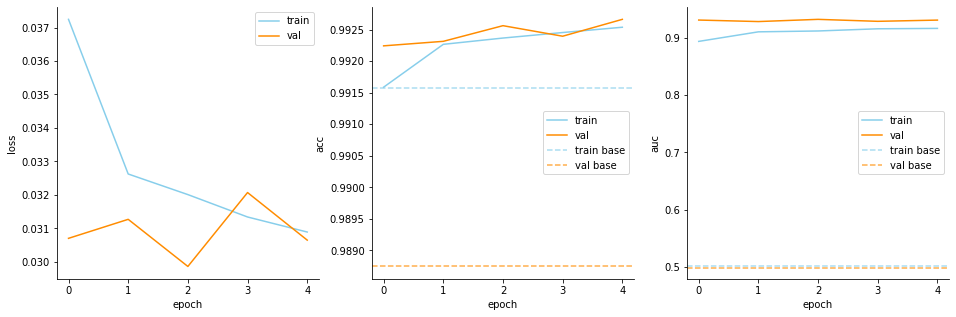

In [5]:
trained_model, train_history = impepdom.load_trained_model(model, save_folder)
impepdom.plot_train_history(train_history, baseline_metrics)